In [2]:
from dolfin import *
import mshr
import numpy as np
import matplotlib.pyplot as plt

In [34]:
domain = mshr.Circle(Point(0.0,0.0), 1.0)
mesh = mshr.generate_mesh(domain, 40)

# plt.figure()
# plot(mesh)

In [35]:
V = FunctionSpace(mesh, "CG", 1)
u0 = Constant(0.0)
bc = DirichletBC(V, u0, "on_boundary")

In [36]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("1.0", degree=2)
a = inner(grad(u), grad(v))*dx
L = f*v*dx

In [37]:
u = Function(V)
solve(a == L, u, bc)

Solving linear variational problem.


In [38]:
def u_exact(x, y):
    return -1/4*(x**2 + y**2 - 1.0)

Object cannot be plotted directly, projecting to piecewise linears.


Text(0.5, 1.0, 'Error')

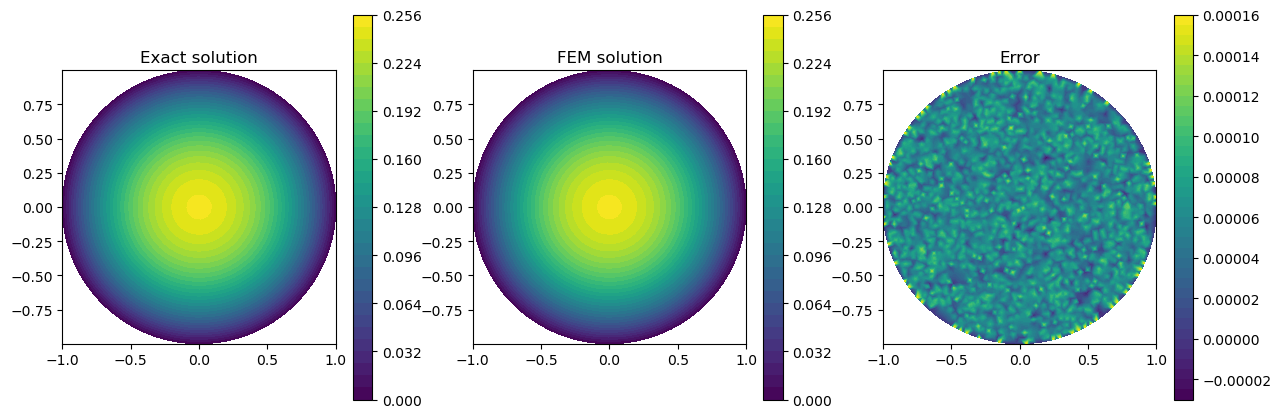

In [39]:
u_ex = Expression("-(x[0]*x[0] + x[1]*x[1] - 1.0)/4", degree=2)
u_ex = interpolate(u_ex, V)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
c = plot(u_ex)
plt.colorbar(c)
plt.title("Exact solution")

plt.subplot(1,3,2)
c = plot(u)
plt.colorbar(c)
plt.title("FEM solution")

plt.subplot(1,3,3)
c = plot(u_ex - u)
plt.colorbar(c)
plt.title("Error")

In [40]:
vertex = mesh.coordinates()
u_ex_np = u_ex.vector().get_local()
u_np = u.vector().get_local()

In [41]:
vertex

array([[ 1.        ,  0.        ],
       [ 0.99875692,  0.04984589],
       [ 0.99503078,  0.09956785],
       ...,
       [ 0.60772457,  0.31315112],
       [-0.7061796 ,  0.09066311],
       [ 0.50923578, -0.1419759 ]])

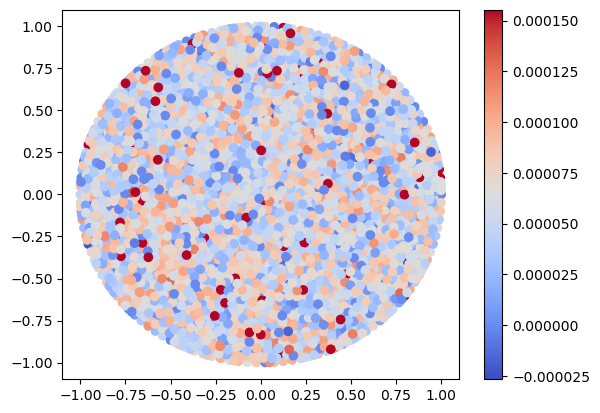

In [42]:
plt.figure()
plt.scatter(vertex[:,0], vertex[:,1], c=u_ex_np-u_np, cmap="coolwarm")
plt.colorbar()
